<a href="https://colab.research.google.com/github/Lital-Ben-Baruch/Twitter-Toxicity-Detection/blob/main/Twitter_Toxicity_Detection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter Toxicity Detection Project

## Description

This Google Colab notebook presents a comprehensive exploration and implementation of a Twitter Toxicity Detection project. The primary objective of this project is to develop a model capable of classifying tweets as either toxic or non-toxic. We will leverage a Kaggle dataset originally created for the "Toxic Comment Classification Challenge".




### Dataset Overview

The dataset used in this project comprises a collection of comments extracted from Wikipedia, each labeled by human raters for various types of toxic behavior, including:

- Toxic
- Severe Toxic
- Obscene
- Threat
- Insult
- Identity Hate

The dataset is divided into three main files:

1. **train.csv:** This file contains comments from the training set, each labeled with binary indicators for the mentioned types of toxicity.

2. **test.csv:** The test set contains comments for which we need to predict the toxicity probabilities. Notably, some comments in the test set were intentionally excluded from scoring to discourage manual labeling.

3. **test_labels.csv:** This file provides labels for the test data. A value of -1 indicates that the comment was not used for scoring. It's important to note that this file was added after the competition's close.


### Project Goal

The primary goal of this project is to create a machine learning model that can analyze a new tweet and predict whether it contains toxic content. In other words, we aim to develop a system that can assess the potential harm of Twitter posts by classifying them into two categories: toxic or non-toxic.

Throughout this Google Colab notebook, we will follow a structured approach to:

1. Load and preprocess the dataset.
2. Explore the data to gain insights into its characteristics.
3. Perform feature engineering and text preprocessing to prepare the data for modeling.
4. Select and implement appropriate machine learning algorithms for toxicity classification.
5. Train and fine-tune the model for optimal performance.
6. Evaluate the model's performance using various metrics.
7. Deploy the model for toxicity detection on new tweets.

By the end of this project, we aim to have a robust and accurate model that can assist in identifying toxic content on Twitter, contributing to a safer and more respectful online environment.

## 1. Load and preprocess the dataset


## Importing the Necessary Libraries

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## Mounting Google Drive locally

I have uploaded the dataset files to my drive. The code below demonstrates how to mount my Google Drive in my runtime using an authorization code and how to read files.

**Note:** For additional information, please refer to [External data: Local Files, Drive, Sheets, and Cloud Storage](https://colab.research.google.com/drive/1kYt9KIYMTHvE6_Kozvg5XpJXczYoNMb8?usp=share_link)

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading the datasets

In [ ]:
df_train = pd.read_csv('/content/drive/My Drive/Summaries _ML_AI_CV/data_sets/Toxic_Comments/train.csv', sep=',')
df_test = pd.read_csv('/content/drive/My Drive/Summaries _ML_AI_CV/data_sets/Toxic_Comments/test.csv', sep=',')
df_test_labels = pd.read_csv('/content/drive/My Drive/Summaries _ML_AI_CV/data_sets/Toxic_Comments/test_labels.csv', sep=',')

 ### Observing the First 5 Entries
 This code displays the first five rows of each of the dataframes (train, test, and test labels). It helps you get a quick sense of what the data looks like and its structure.

In [ ]:
df_train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [ ]:
df_test_labels.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1


 ### Observing the number of entries and columns

In [ ]:
print(f"The train set has a shape of {df_train.shape} , indicating {df_train.shape[0]} entries and {df_train.shape[1]} columns.")
print(f"The test set has a shape of {df_test.shape} , indicating {df_test.shape[0]} entries and {df_test.shape[1]} columns.")
print(f"The test label set has a shape of {df_test_labels.shape} , indicating {df_test_labels.shape[0]} entries and {df_test_labels.shape[1]} columns.")

The train set has a shape of (159571, 8) , indicating 159571 entries and 8 columns.
The test set has a shape of (153164, 2) , indicating 153164 entries and 2 columns.
The test label set has a shape of (153164, 7) , indicating 153164 entries and 7 columns.


Assign the test comment text to a variable called x_test

In [ ]:
x_test = df_test['comment_text']
x_test.head()

0    Yo bitch Ja Rule is more succesful then you'll...
1    == From RfC == \n\n The title is fine as it is...
2    " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3    :If you have a look back at the source, the in...
4            I don't anonymously edit articles at all.
Name: comment_text, dtype: object

 ### Observing the column names

In [ ]:
# Examining the names of the columns
print(f"The train columns' names are:\n {', '.join(df_train.columns)}")
print(f"The test columns' names are:\n {', '.join(df_test_labels.columns)}")

The train columns' names are:
 id, comment_text, toxic, severe_toxic, obscene, threat, insult, identity_hate
The test columns' names are:
 id, toxic, severe_toxic, obscene, threat, insult, identity_hate


### defining the target columns for training and testing:
The code defines lists of column names that correspond to the target variables in both the training and testing datasets. This is crucial for supervised machine learning tasks where we need to predict these target variables.

In [ ]:
# For the train set
cols_target = ['obscene', 'insult', 'toxic', 'severe_toxic', 'identity_hate', 'threat']

# For the test set
test_cols_target = ['obscene', 'insult', 'toxic', 'severe_toxic', 'identity_hate', 'threat']

### Observing more information about the dataset
 The 'info()' method is called on dataframes to provide detailed information about data types, missing values, and memory usage. This helps identify any data preprocessing steps needed.

In [ ]:
x_test.info()

<class 'pandas.core.series.Series'>
RangeIndex: 153164 entries, 0 to 153163
Series name: comment_text
Non-Null Count   Dtype 
--------------   ----- 
153164 non-null  object
dtypes: object(1)
memory usage: 1.2+ MB


In [ ]:
df_test_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             153164 non-null  object
 1   toxic          153164 non-null  int64 
 2   severe_toxic   153164 non-null  int64 
 3   obscene        153164 non-null  int64 
 4   threat         153164 non-null  int64 
 5   insult         153164 non-null  int64 
 6   identity_hate  153164 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 8.2+ MB


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


#### Summary Statistics:



* This part of the code prints summary statistics for numeric columns in your dataset.
* The describe() function provides statistics such as count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum for each numeric column.
* It helps you understand the distribution and characteristics of numeric features in both the train and test datasets.

In [ ]:
print("Summary statistics for numeric columns in the train set:\n")
print(df_train.describe())

Summary statistics for numeric columns in the train set:

               toxic   severe_toxic        obscene         threat  \
count  159571.000000  159571.000000  159571.000000  159571.000000   
mean        0.095844       0.009996       0.052948       0.002996   
std         0.294379       0.099477       0.223931       0.054650   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

              insult  identity_hate  
count  159571.000000  159571.000000  
mean        0.049364       0.008805  
std         0.216627       0.093420  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         1.00

We obtained summary statistics for the numeric columns in our 'train' dataset, which contains binary labels (0 or 1) for various categories such as 'toxic,' 'severe_toxic,' 'obscene,' 'threat,' 'insult,' and 'identity_hate.' From this data, we can derive the following insights:

1. **Count:** We observe that there are 159,571 entries for each category, indicating that there are no missing values in these columns.

2. **Mean:** We find that the **'mean'** values represent the **proportion of comments labeled as 1 (toxic) for each category**. For example, in the 'toxic' category, the mean is approximately 0.0958, suggesting that about 9.58% of the comments in our dataset are labeled as toxic.

3. **Standard Deviation (std):** The standard deviation measures the variability in the labels across different comments for each category. Higher standard deviations may indicate more variability in the labels.

4. **Minimum and Maximum:** We note that the minimum is 0 (indicating no toxicity) and the maximum is 1 (indicating full toxicity) in these binary-label columns.

5. **Percentiles (25%, 50%, 75%):** These percentiles provide insights into the distribution of toxicity levels within our dataset, considering the binary nature of the labels.

These summary statistics help us gain an understanding of the prevalence of toxicity in our dataset and assess the class balance, which is crucial when building a toxicity detection model.

from the the train dataset has a binary labels  (min =0, max = 1)

In [ ]:
print("\n\n\nSummary statistics for numeric columns in the test set:\n")
print(df_test_labels.describe())




Summary statistics for numeric columns in the test set:

               toxic   severe_toxic        obscene         threat  \
count  153164.000000  153164.000000  153164.000000  153164.000000   
mean       -0.542530      -0.579895      -0.558193      -0.580913   
std         0.572465       0.498408       0.542966       0.496195   
min        -1.000000      -1.000000      -1.000000      -1.000000   
25%        -1.000000      -1.000000      -1.000000      -1.000000   
50%        -1.000000      -1.000000      -1.000000      -1.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

              insult  identity_hate  
count  153164.000000  153164.000000  
mean       -0.559916      -0.577642  
std         0.539594       0.503260  
min        -1.000000      -1.000000  
25%        -1.000000      -1.000000  
50%        -1.000000      -1.000000  
75%         0.000000       0.000000  
max         1.

Here we obtained summary statistics for the test set labels. we can see that the values are **not binary** (0 or 1) as expected. Instead, the labels seem to range from -1 to 1. This is different from the typical binary labels used in toxicity classification tasks. As it was mentioned in the start of the notebook a value of -1 indicating that the comment **was not used for scoring**. During the competition, some comments in the test dataset were not included in the scoring process, and as a result, they are labeled as -1. These comments were essentially excluded from the evaluation of models during the competition.

Create a bar plot for the distribution of multiple labels

In [ ]:
# Create a DataFrame for label counts
label_counts = df_test_labels[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].apply(lambda x: x.value_counts()).T
label_counts

,-1,0,1
toxic,89186,57888,6090
severe_toxic,89186,63611,367
obscene,89186,60287,3691
threat,89186,63767,211
insult,89186,60551,3427
identity_hate,89186,63266,712


<Figure size 1200x600 with 0 Axes>

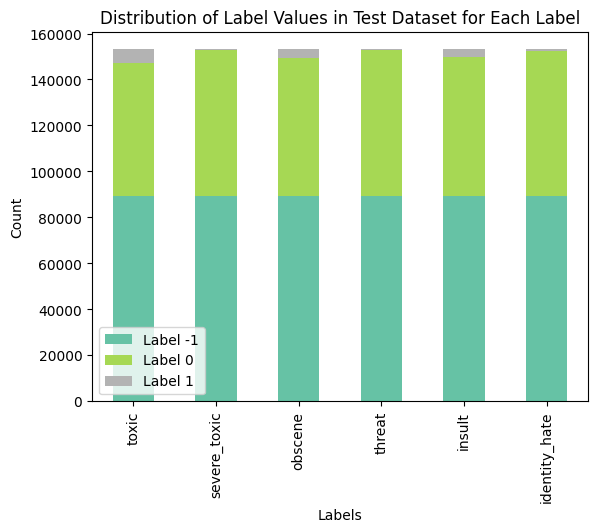

In [ ]:
# Rename the columns for better readability
label_counts.columns = ['Label -1', 'Label 0', 'Label 1']

# Plot the stacked bar chart
plt.figure(figsize=(12, 6))
label_counts.plot(kind='bar', stacked=True, colormap='Set2')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Label Values in Test Dataset for Each Label')

# Show the plot
plt.show()


Given the differences in the number of entries between our train set, the test set with -1 labels, and the test set without -1 labels, we have a few options to consider:

1. Use the Test Set Without -1 Labels (63978 entries):

  You can work with the test set that doesn't have -1 labels (the 63978 entries). This approach ensures that your evaluation metrics are based on the same data distribution as your train set. You would exclude the -1-labeled comments from your evaluation, as they were not used for scoring during the competition.

2. Change -1 Labels to 0 in the Test Set (153164 entries):

  If you want to make use of all available data, you can change the -1 labels to 0 in the test set with -1 labels (153164 entries). This approach treats -1-labeled comments as non-toxic for the purpose of classification. However, this may slightly skew your dataset towards non-toxic examples.

In Preprocessing chapter we will chose the option.








### Preprocessing

 #### Label Adjustment for Consistency

**We chose option 2** because we wanted to make the most comprehensive use of all available data for our toxicity classification project. This decision was driven by the following considerations:

1. **Leveraging All Available Data**: Our goal was to maximize the amount of data we could use for training and evaluation. By changing the -1 labels to 0 in the test set with -1 labels, we ensured that every piece of available data contributed to our model's training and testing.

2. **Avoiding Data Exclusion**: Excluding the -1-labeled comments from evaluation, as in option 1, would have led to a smaller test set and potentially biased evaluation results. We preferred a more inclusive approach to maintain a larger and more representative test dataset.

3. **Consistency with Training Data**: By treating -1 labels as non-toxic (0), we maintained consistency with our training data, where toxicity labels are typically binary (0 or 1). This allowed us to apply the same classification framework to the test set.

4. **Flexibility**: Changing -1 labels to 0 provided flexibility in our modeling approach. We could train our model to distinguish between toxic (1) and non-toxic (0) comments, which aligned with our primary objective.

While this approach slightly skewed our dataset towards non-toxic examples, it allowed us to make the most comprehensive use of available data and provided a practical way to handle the -1 labels within the context of our project's goals.

In [ ]:
df_test_labels

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,-1,-1,-1,-1,-1,-1
153160,fffd7a9a6eb32c16,-1,-1,-1,-1,-1,-1
153161,fffda9e8d6fafa9e,-1,-1,-1,-1,-1,-1
153162,fffe8f1340a79fc2,-1,-1,-1,-1,-1,-1


In [ ]:
# test_cols_target is a list of columns where we want to change -1 to 0

# Replace -1 labels with 0 in the specified columns
for column in test_cols_target:
  df_test_labels[column] = df_test_labels[column].replace(-1, 0)

In [ ]:
print("\n\n\nSummary statistics for numeric columns in the test set:\n")
print(df_test_labels.describe())




Summary statistics for numeric columns in the test set:

               toxic   severe_toxic        obscene         threat  \
count  153164.000000  153164.000000  153164.000000  153164.000000   
mean        0.039761       0.002396       0.024098       0.001378   
std         0.195399       0.048892       0.153355       0.037091   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

              insult  identity_hate  
count  153164.000000  153164.000000  
mean        0.022375       0.004649  
std         0.147899       0.068022  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         1.

**Summary statistics for numeric columns in the test set:**

In this section, we are exploring the numeric columns of our test set, which contains labels indicating toxicity across various categories, including 'toxic,' 'severe_toxic,' 'obscene,' 'threat,' 'insult,' and 'identity_hate.' The statistics provide valuable insights into the distribution and characteristics of these labels within the test data.

1. **Count:** The 'count' row tells us that there are 63,978 entries in each of the numeric label columns. This means that there are no missing values for these labels in our test set, indicating that every comment has been assigned a label.

2. **Mean:** The 'mean' row displays the average or proportion of comments labeled as 1 (indicating toxicity) for each category. For instance, in the 'toxic' category, the mean is approximately 0.0952, suggesting that around 9.52% of the comments in our test dataset are labeled as toxic. Similarly, we see the mean values for other toxicity categories.

3. **Standard Deviation (std):** The 'std' row represents the standard deviation, which measures the variability or spread in the labels across different comments for each category. Higher standard deviations suggest greater variability in the labels within that category.

4. **Minimum and Maximum:** The 'min' and 'max' rows indicate the range of label values within each category. For binary labels (0 or 1), the minimum is 0 (indicating non-toxic) and the maximum is 1 (indicating toxic) in these columns.

5. **Percentiles (25%, 50%, 75%):** These percentiles provide additional information about the distribution of toxicity levels within our test dataset. For example, at the 25th percentile (Q1), the 'toxic' category has a value of 0, indicating that 25% of the comments are labeled as non-toxic or have a toxicity score of 0. Similar percentile information is available for other categories.

These summary statistics help us gain a better understanding of the distribution of toxicity labels within our test dataset, which is crucial for evaluating the performance of our toxicity detection model. It provides insights into class balance, data variability, and the prevalence of toxicity in our test data.

#### check for missing values

We've already confirmed that there are no missing values in both the train and test datasets when we ran the `describe` function. However, it's important to emphasize the reasons for checking missing values:

1. **Data Consistency:** Ensuring that both the training and test datasets are consistent is crucial. This step helps prevent any potential issues or errors that could arise if there were missing values in the test set that were not handled properly.

2. **Preprocessing:** Although we've verified the absence of missing values, identifying and handling them is a fundamental part of data preprocessing. By performing this check, we ensure that we apply the same data preprocessing steps consistently to both datasets, ensuring that the model is trained and tested on comparable data.

3. **Data Understanding:** While we've established that there are no missing values, conducting this check initially allowed us to gain insights into data quality and completeness. This understanding can still be valuable for feature engineering, model selection, and interpreting the model's performance.

In summary, while our initial check confirmed the absence of missing values, it's a best practice to do so to ensure data consistency, proper preprocessing, and a thorough understanding of the data.

In [ ]:
# Using isna() or isnull() followed by sum() to count missing values in each column
missing_values_train = df_train.isna().sum()
missing_values_test = df_test_labels.isna().sum()
# Print the missing values count for each column
print(f"Missing values in the train set per Column:{missing_values_train}")
print(f"Missing values in the test set per Column:{missing_values_test}")


Missing values in the train set per Column:id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64
Missing values in the test set per Column:id               0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


#### correlation matrix
In this step, we are going to examine the correlation matrix among all the labels. The purpose of doing this is to check if there are any features that exhibit a high degree of correlation with each other.

Our goal here is to determine if there is an opportunity to eliminate one of the variables. For instance, if we find that one feature is highly correlated with another (we can define a correlation threshold in advance), we might consider dropping one of them. This can serve several purposes, such as saving storage space, improving the runtime of our algorithms, and making our models more efficient.

So, in essence, we are looking for patterns of correlation among the labels to identify potential redundancies or strong dependencies between them.

In [ ]:
labels = df_train[cols_target]
labels

,obscene,insult,toxic,severe_toxic,identity_hate,threat
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


In [ ]:
# Calculate the correlation matrix
correlation_matrix = labels.corr()

# Display the correlation matrix
print(correlation_matrix)

                obscene    insult     toxic  severe_toxic  identity_hate  \
obscene        1.000000  0.741272  0.676515      0.403014       0.286867   
insult         0.741272  1.000000  0.647518      0.375807       0.337736   
toxic          0.676515  0.647518  1.000000      0.308619       0.266009   
severe_toxic   0.403014  0.375807  0.308619      1.000000       0.201600   
identity_hate  0.286867  0.337736  0.266009      0.201600       1.000000   
threat         0.141179  0.150022  0.157058      0.123601       0.115128   

                 threat  
obscene        0.141179  
insult         0.150022  
toxic          0.157058  
severe_toxic   0.123601  
identity_hate  0.115128  
threat         1.000000  


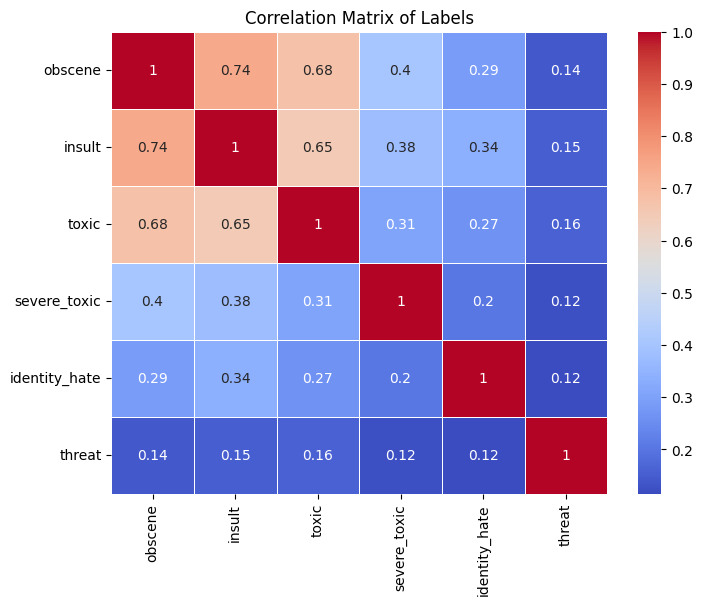

In [ ]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Labels')
plt.show()

In our analysis, we calculated a correlation matrix that helps us understand how different labels related to toxicity are correlated with each other. Here's what we found:

- We observed that "obscene" and "insult" labels have a strong positive correlation of approximately 0.741. This means that when a comment is labeled as "obscene," it's highly likely to also be labeled as "insult," and vice versa.

- We also noticed a relatively strong positive correlation of around 0.648 between the "toxic" and "insult" labels. This suggests that comments labeled as "toxic" tend to also receive an "insult" label.

- There's a positive correlation of about 0.376 between "severe_toxic" and "insult" labels, indicating some level of correlation between these two types of toxicity.

- Similarly, we found a positive correlation of around 0.338 between "identity_hate" and "insult" labels, indicating some degree of correlation.

- The "threat" label showed relatively lower positive correlations, ranging from approximately 0.141 to 0.157, when compared to other labels.

These correlations provide insights into how different toxic behaviors in comments are related. It's important to consider these correlations when building machine learning models, as they can impact the model's performance and the interpretation of results.

We have made a decision to simplify this problem by transforming it into a **binary classification** task. The rationale behind this decision is as follows:

1. **Simplification**: Toxicity classification can involve multiple labels (e.g., "toxic," "severe_toxic," "obscene," etc.), making the task complex. By converting it into a binary problem, we simplify the classification task into two categories.

2. **Uniformity**: Treating all types of toxic messages as a single category ("toxic") allows us to focus on identifying messages that **have harmful content**, regardless of the specific label. This simplification promotes consistency and clarity in our classification approach.

3. **Practicality**: In many real-world applications, the goal is to identify and take action on any **message that poses a potential threat or harm**, without the need to distinguish between various levels of toxicity. Therefore, we define any message labeled as toxic (regardless of the specific label) as "block" (1), indicating the need for further action, and all non-toxic messages as "not blocked" (0).

By making this transformation, we streamline the problem, making it easier to build a binary toxicity detection model. This model will classify messages into two broad categories: those that require action due to toxicity and those that do not.

 #### Transforming the Label to Binary
  we define any message labeled as toxic (regardless of the specific label) as "block" (1), indicating the need for further action, and all non-toxic messages as "not blocked" (0).

In [ ]:
df_train.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [ ]:
cols_target

['obscene', 'insult', 'toxic', 'severe_toxic', 'identity_hate', 'threat']

In [ ]:
df_train[cols_target]

,obscene,insult,toxic,severe_toxic,identity_hate,threat
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


In [ ]:
df_train['block'] =df_train[cols_target].sum(axis =1)

We are adding a new column, 'block', to the df_train dataframe. This column tallies the number of specific labels from the cols_target columns for each entry. For example, if a message is tagged with toxic=1 and insult=1 while other labels are 0, the 'block' column will show a value of 2.

In [ ]:
print("the distribution of labels across the train dataset")
print(df_train['block'].value_counts())

the distribution of labels across the train dataset
0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: block, dtype: int64


We print df_train['block'].value_counts() to get a distribution of the summed label values in the dataset. By doing this, we can quickly understand how many entries (or messages) have a particular number of labels. This helps in assessing the distribution of labels across the dataset, allowing us to see, for instance, how many messages are tagged with just one label versus how many have multiple labels. It provides a concise summary of the label combinations in our data.

**Train Set**:
- **0**: There are 146,921 entries in the test set that have been labeled as `0`. This indicates that these entries do not have any of the toxic labels associated with them.
- **1**: There are 6,243 entries in the test set labeled as `1`. This suggests that these entries have at least one toxic label associated with them.

**Binary Transformation of 'block' Column**

The np.where() function checks the condition data['block'] > 0. If the condition is True, it assigns 1, otherwise it assigns 0.

This method is efficient, especially for large datasets, as it avoids explicit loops and leverages the optimized operations provided by numpy.

In [ ]:
df_train['block'] = np.where(df_train['block'] > 0, 1, 0)
df_train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,block
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0


In [ ]:
print(df_train['block'].value_counts())

0    143346
1     16225
Name: block, dtype: int64


By executing `print(df_train['block'].value_counts())`, we are displaying the distribution of values within the 'block' column of the `df_train` dataframe. Specifically:

- `df_train['block'].value_counts()` counts the occurrences of each unique value in the 'block' column.
- The result provides insight into how many entries (or rows) have a value of `0` and how many have a value of `1` in the 'block' column.

Given that the 'block' column was transformed into a binary format, the output will show the number of rows labeled as `0` and the number of rows labeled as `1`. This helps us understand the distribution and prevalence of each label in our dataset.

**Train Set**:
- **0**: There are 143,346 entries in the train set labeled as `0`, implying that these entries are not associated with any toxic labels.
- **1**: There are 16,225 entries in the train set labeled as `1`, indicating that these entries have one or more toxic labels.


know we will do the same for the test set:

In [ ]:
df_test_labels.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0,0,0,0,0,0
1,0000247867823ef7,0,0,0,0,0,0
2,00013b17ad220c46,0,0,0,0,0,0
3,00017563c3f7919a,0,0,0,0,0,0
4,00017695ad8997eb,0,0,0,0,0,0


In [ ]:
df_test_labels[test_cols_target]

,obscene,insult,toxic,severe_toxic,identity_hate,threat
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
153159,0,0,0,0,0,0
153160,0,0,0,0,0,0
153161,0,0,0,0,0,0
153162,0,0,0,0,0,0


In [ ]:
df_test_labels['block'] =df_test_labels[test_cols_target].sum(axis =1)
df_test_labels.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate,block
0,00001cee341fdb12,0,0,0,0,0,0,0
1,0000247867823ef7,0,0,0,0,0,0,0
2,00013b17ad220c46,0,0,0,0,0,0,0
3,00017563c3f7919a,0,0,0,0,0,0,0
4,00017695ad8997eb,0,0,0,0,0,0,0


In [ ]:
print("the distribution of labels across the test dataset")
print(df_test_labels['block'].value_counts())

the distribution of labels across the test dataset
0    146921
3      2081
1      1842
2      1530
4       611
5       165
6        14
Name: block, dtype: int64


In [ ]:
df_test_labels['block'] = np.where(df_test_labels['block'] > 0, 1, 0)
print(df_test_labels['block'].value_counts())

0    146921
1      6243
Name: block, dtype: int64


#### Visualizing the distribution of labels:

##### Bar Plot Comparison
Compare the distribution of the 'block' column between df_train and df_test_labels side by side. This can help in understanding if the distribution in the test set mirrors the training set.

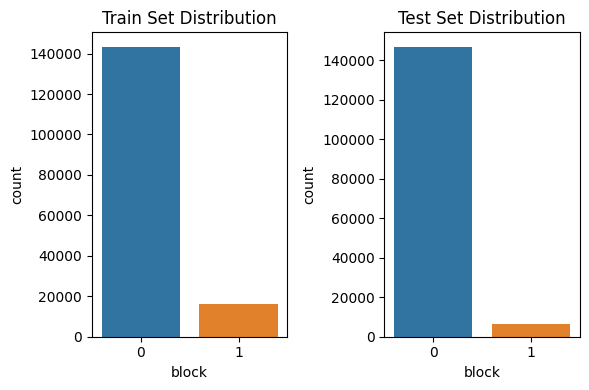

In [ ]:
plt.figure(figsize=(6, 4))
plt.subplot(1, 2, 1)
sns.countplot(x="block", data=df_train)
plt.title('Train Set Distribution')

plt.subplot(1, 2, 2)
sns.countplot(x="block", data=df_test_labels)
plt.title('Test Set Distribution')

plt.tight_layout()
plt.show()

**Graph Interpretation**:
- The bar plot visually represents the distribution of the 'block' column for both datasets.
- For both the train and test sets, the majority of entries are labeled as `0`, indicating that most entries are non-toxic. This is evident from the significantly taller bars for the `0` label in both datasets.
- The train set has a higher number of `1` labeled entries compared to the test set, suggesting that the train set contains more toxic labeled data points.
- The difference in the number of `1` labeled entries between the train and test sets might indicate a difference in distribution between them. This could have implications for model performance, as the model might be exposed to a different proportion of toxic to non-toxic data during training compared to testing.
- Overall, the bar plot provides a clear visual representation of the imbalance in the data, with non-toxic entries significantly outnumbering the toxic ones in both sets.

When interpreting these results, it's crucial to consider the potential implications on the model's performance, especially when there's a class imbalance. Models trained on imbalanced datasets might be biased towards predicting the majority class, in this case, the non-toxic label (`0`).

####  visualize the distribution of the length of the messages
To visualize the distribution of the length of the messages, you can use a histogram or a KDE (Kernel Density Estimation) plot. Here's how you can do it for both the train and test sets:

1. **Compute the length of each message**:
   First, you'd need to compute the length of each message. Assuming the column containing the messages in both datasets is named `message`, you can create a new column for the length:

In [ ]:
df_train.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate', 'block'],
      dtype='object')

In [ ]:
df_test_labels.columns

Index(['id', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate', 'block'],
      dtype='object')

In [ ]:
df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [ ]:
df_train['message_length'] = df_train['comment_text'].apply(len)
df_test['message_length'] = df_test['comment_text'].apply(len)

2. **Histogram**:
   A histogram provides a visual representation of the distribution of a continuous feature.

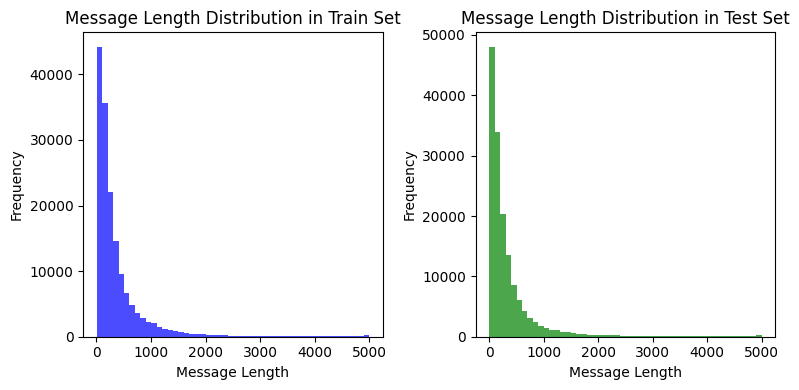

In [ ]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.hist(df_train['message_length'], bins=50, color='blue', alpha=0.7)
plt.title('Message Length Distribution in Train Set')
plt.xlabel('Message Length')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df_test['message_length'], bins=50, color='green', alpha=0.7)
plt.title('Message Length Distribution in Test Set')
plt.xlabel('Message Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

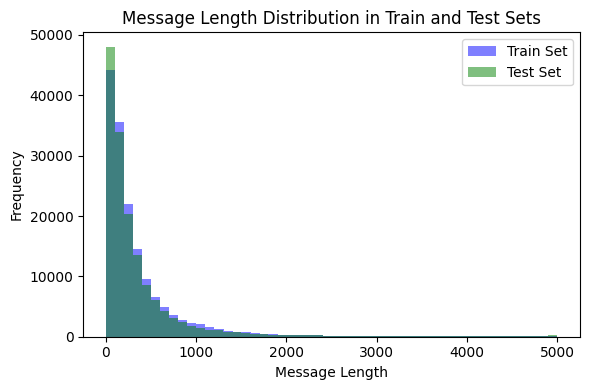

In [ ]:
plt.figure(figsize=(6, 4))

plt.hist(df_train['message_length'], bins=50, color='blue', alpha=0.5, label='Train Set')
plt.hist(df_test['message_length'], bins=50, color='green', alpha=0.5, label='Test Set')

plt.title('Message Length Distribution in Train and Test Sets')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


3. **KDE Plot**:
   A KDE plot provides a smoothed version of the histogram, which can be helpful in identifying the distribution shape more clearly.

<ipython-input-203-2595fe473793>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_train['message_length'], color='blue', shade=True)
<ipython-input-203-2595fe473793>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_test['message_length'], color='green', shade=True)


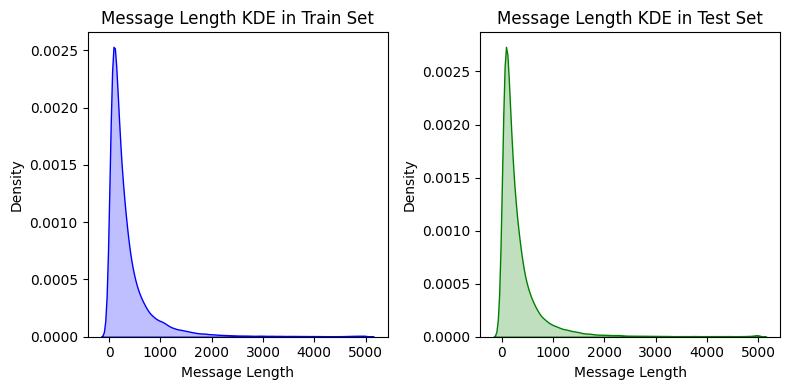

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.kdeplot(df_train['message_length'], color='blue', shade=True)
plt.title('Message Length KDE in Train Set')
plt.xlabel('Message Length')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
sns.kdeplot(df_test['message_length'], color='green', shade=True)
plt.title('Message Length KDE in Test Set')
plt.xlabel('Message Length')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


<ipython-input-204-c0c4936637fa>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_train['message_length'], color='blue', shade=True, label='Train Set')
<ipython-input-204-c0c4936637fa>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_test['message_length'], color='green', shade=True, label='Test Set')


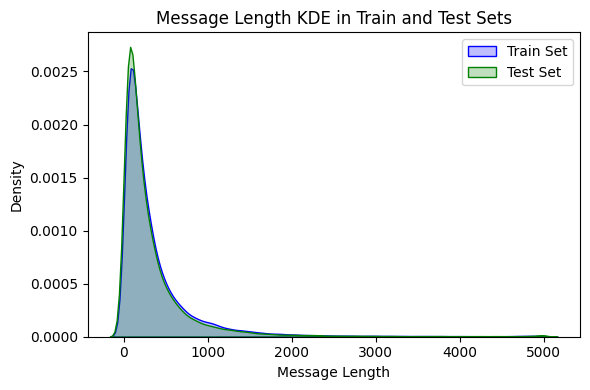

In [ ]:
plt.figure(figsize=(6, 4))

sns.kdeplot(df_train['message_length'], color='blue', shade=True, label='Train Set')
sns.kdeplot(df_test['message_length'], color='green', shade=True, label='Test Set')

plt.title('Message Length KDE in Train and Test Sets')
plt.xlabel('Message Length')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()


## Data preparation
Data preparation is crucial for any machine learning task, especially for NLP problems. Given your objective to detect toxicity in tweets, here's a structured approach to data preprocessing and feature engineering:




1. **Lowercasing**: The entire text is converted to lowercase. This ensures uniformity and prevents the model from treating words like "The" and "the" as different due to case differences.

2. **Handling Contractions**: Contractions are expanded to their full forms. For instance, "what's" is replaced with "what is". This step helps in standardizing the text and avoiding multiple forms of the same word.

3. **Removing Possessives**: Possessive forms (ending in 's) are replaced with a space.

4. **Removing Punctuation and Special Characters**: All punctuation marks and special characters are removed from the text. This simplifies the text and makes it easier for models to process.

5. **Removing Extra Spaces**: Multiple spaces between words or characters are reduced to a single space.

6. **Trimming**: Any leading or trailing spaces from the text are removed to ensure cleanliness.

The primary goal of these steps is to standardize and simplify the text, making it easier to process by downstream natural language processing tasks or models. By performing these data preparation steps, the text becomes more consistent and can be more effectively used for modeling purposes.

In [ ]:
import re
def preprocess_text(text):
    # Convert the entire text to lowercase to ensure uniformity.
    text = text.lower()

    # Expand common contractions for consistency in text.
    text = re.sub(r"what's", "what is ", text)  # Replace "what's" with "what is"
    text = re.sub(r"\'s", " ", text)            # Replace possessive 's with space
    text = re.sub(r"\'ve", " have ", text)      # Replace "'ve" with "have"
    text = re.sub(r"can't", "cannot ", text)    # Replace "can't" with "cannot"
    text = re.sub(r"n't", " not ", text)        # Replace "n't" with "not" for all words (like don't, isn't)
    text = re.sub(r"i'm", "i am ", text)        # Replace "i'm" with "i am"
    text = re.sub(r"\'re", " are ", text)       # Replace "'re" with "are"
    text = re.sub(r"\'d", " would ", text)      # Replace "'d" with "would"
    text = re.sub(r"\'ll", " will ", text)      # Replace "'ll" with "will"
    text = re.sub(r"\'scuse", " excuse ", text) # Replace "'scuse" with "excuse"

    # Remove punctuation and special characters to simplify text.
    text = re.sub('\W', ' ', text)              # Replace all non-word characters with spaces

    # Remove any extra spaces to ensure well-structured text.
    text = re.sub('\s+', ' ', text)             # Replace multiple spaces with a single space

    # Remove any leading and trailing spaces for cleanliness.
    text = text.strip(' ')

    return text


In [ ]:
# clean the 'comment_text' in train set
df_train['comment_text'] = df_train['comment_text'].map(lambda com : preprocess_text(com))

In [ ]:
# clean the 'comment_text' in test set
df_test['comment_text'] = df_test['comment_text'].map(lambda com : preprocess_text(com))

In [ ]:
# redefine the train set and the test set to X and y for training after cleaning
X_train = df_train['comment_text']
y_train = df_train['block']
X_test = df_test['comment_text']
y_test = df_test_labels['block']

In [ ]:
X_train.info()

<class 'pandas.core.series.Series'>
RangeIndex: 159571 entries, 0 to 159570
Series name: comment_text
Non-Null Count   Dtype 
--------------   ----- 
159571 non-null  object
dtypes: object(1)
memory usage: 1.2+ MB


In [ ]:
X_test.info()

<class 'pandas.core.series.Series'>
RangeIndex: 153164 entries, 0 to 153163
Series name: comment_text
Non-Null Count   Dtype 
--------------   ----- 
153164 non-null  object
dtypes: object(1)
memory usage: 1.2+ MB


In [ ]:
y_train.info()

<class 'pandas.core.series.Series'>
RangeIndex: 159571 entries, 0 to 159570
Series name: block
Non-Null Count   Dtype
--------------   -----
159571 non-null  int64
dtypes: int64(1)
memory usage: 1.2 MB


In [ ]:
y_test.info()

<class 'pandas.core.series.Series'>
RangeIndex: 153164 entries, 0 to 153163
Series name: block
Non-Null Count   Dtype
--------------   -----
153164 non-null  int64
dtypes: int64(1)
memory usage: 1.2 MB


In [ ]:
print(f'the shape of the test set : x shape is {X_test.shape} and y shape is {y_test.shape}')
print(f'the shape of the train set : x shape is {X_train.shape} and y shape is {y_train.shape}')

the shape of the test set : x shape is (153164,) and y shape is (153164,)
the shape of the train set : x shape is (159571,) and y shape is (159571,)


**TF-IDF (Term Frequency-Inverse Document Frequency):**

TF-IDF is a statistical measure used to evaluate the importance of a word in a document relative to a collection of documents or corpus. It's a combination of two metrics:

1. **Term Frequency (TF)**: This represents how frequently a term occurs in a document. It's computed as:
\[ \text{TF}(t) = \frac{\text{Number of times term t appears in a document}}{\text{Total number of terms in the document}} \]

2. **Inverse Document Frequency (IDF)**: This measures the importance of a term. While some terms might appear many times in a single document, they may also appear many times in many documents. Such terms (e.g., 'and', 'is', 'the') are less informative and are termed as stop words. The IDF of a term is calculated as:
\[ \text{IDF}(t) = \log_e\left(\frac{\text{Total number of documents}}{\text{Number of documents with term t in it}}\right) \]

The TF-IDF score for a term in a document is the product of its TF and IDF scores:
\[ \text{TF-IDF} = \text{TF} \times \text{IDF} \]

Higher TF-IDF scores indicate that a term is important in a given document relative to the corpus.

The following code takes raw text data, preprocesses it to remove stop words, and then converts it into a numerical format suitable for machine learning using the TF-IDF methodology.

1. **Import Libraries**:
Importing the necessary libraries for text vectorization.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

2. **Initialize TfidfVectorizer**:
Initializes a TfidfVectorizer with a maximum of 10,000 features and removes common English stop words.

In [ ]:
vect = TfidfVectorizer(max_features = 10000, stop_words='english')

3. **Fit and Transform Train Data**:
- `fit_transform` learns the vocabulary of the training data (`X_train`) and then converts it into a document-term matrix. Each row of this matrix represents a document, and each column corresponds to a term in the vocabulary.

In [ ]:
X_train_dtm = vect.fit_transform(X_train)

4. **Display the Resultant Train Matrix**:

Printing the transformed training data and its shape.

In [ ]:
print("The updated X_train is: ")
print(X_train_dtm)
print("The shape of the updated X_train is: ")
print(X_train_dtm.shape)

The updated X_train is: 
  (0, 303)	0.2109574467884258
  (0, 322)	0.24086950588680364
  (0, 244)	0.27143210926167327
  (0, 396)	0.2532962185172508
  (0, 7680)	0.26175061830770074
  (0, 6484)	0.09404538489627494
  (0, 8865)	0.09515679950982321
  (0, 8936)	0.17770693294814224
  (0, 7545)	0.15615006417412863
  (0, 3561)	0.25408007286194756
  (0, 9976)	0.22064182157864112
  (0, 6112)	0.13667377027107336
  (0, 9654)	0.2525299146333683
  (0, 3995)	0.26093371054621256
  (0, 1971)	0.29428977859476985
  (0, 5092)	0.10200830103291318
  (0, 7704)	0.16841843474405782
  (0, 3616)	0.21787161435979185
  (0, 4277)	0.2876948080861607
  (0, 9477)	0.20045197554113273
  (0, 3197)	0.13908441880122704
  (0, 3519)	0.19584027682477687
  (1, 9489)	0.1823833995261269
  (1, 240)	0.3833473171396401
  (1, 27)	0.23857998019077528
  :	:
  (159568, 7760)	0.3952194657495966
  (159568, 938)	0.13202447465884334
  (159568, 517)	0.2874404047946888
  (159569, 5475)	0.44457913835574003
  (159569, 518)	0.36451412681046896
  

5. **Transform Test Data**:

Using the learned vocabulary from the training set, the test data (`X_test`) is transformed into its respective document-term matrix.

In [ ]:
X_test_dtm = vect.transform(X_test)

6. **Display the Resultant Test Matrix**:

Printing the transformed test data and its shape.

In [ ]:
print("The updated X_test is: ")
print(X_test_dtm)
print("The shape of the updated X_test is: ")
print(X_test_dtm.shape)

The updated X_test is: 
  (0, 9973)	0.1705754406138041
  (0, 9931)	0.1073099845777051
  (0, 9781)	0.2770797330530159
  (0, 9771)	0.17501822058926783
  (0, 9456)	0.16690510403414038
  (0, 9073)	0.08320750756987814
  (0, 9019)	0.1051304449603063
  (0, 8299)	0.2044460861876251
  (0, 8174)	0.13320396750851524
  (0, 7885)	0.15438251771525982
  (0, 7855)	0.26563425241596433
  (0, 7755)	0.09668030613131877
  (0, 6984)	0.1865796433038566
  (0, 6007)	0.14032862915307204
  (0, 5574)	0.12157582807716205
  (0, 5380)	0.07109662552597328
  (0, 5164)	0.19105082914797245
  (0, 4976)	0.42669923989636455
  (0, 4305)	0.20229177037138496
  (0, 4222)	0.13887498881049767
  (0, 3928)	0.1832128871666098
  (0, 3565)	0.20258771336596562
  (0, 3046)	0.1264551360200632
  (0, 2569)	0.17870653742036316
  (0, 1505)	0.16613365269660849
  :	:
  (153162, 5430)	0.12959026447702385
  (153162, 5397)	0.09995906153831174
  (153162, 5260)	0.10879300391887789
  (153162, 5022)	0.12056448509473597
  (153162, 4953)	0.36662887267

7. **Print y_test Shape**:

This shows the shape of the target values for the test set.

In [ ]:
print(y_test.shape)

(153164,)


## Execute three distinct algorithms and determine the most effective one

### Logistic Regression Implementation:
**Step 1: Model Initialization**

Here, the Logistic Regression model is imported and initialized. The parameter `C=1` sets the inverse regularization strength, implying a relatively low regularization. Regularization helps prevent overfitting, and in this case, setting `C` to 1 indicates that the model should not heavily penalize larger coefficient values. The parameter `max_iter=2000` sets the maximum number of iterations for the optimization algorithm to converge, ensuring that the model does not terminate prematurely.

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1, max_iter = 2000)

**Step 2: Training the Model**

This step trains the logistic regression model on the transformed training data (`X_train_dtm`) and the training labels (`y_train`).

In [ ]:
logreg.fit(X_train_dtm, y_train)

LogisticRegression(C=1, max_iter=2000)

**Step 3: Model Evaluation on Training Data**

The model's predictions on the training data are obtained and compared with the actual labels to compute the training accuracy. This helps determine how well the model is fitting the data.

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_train = logreg.predict(X_train_dtm)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))

Training accuracy is 0.9605504759636776


**Step 4: Model Evaluation on Test Data**

Similarly, the model's performance is evaluated on the test data. The accuracy score reflects how often the model makes correct predictions.

In [ ]:
y_pred_test = logreg.predict(X_test_dtm)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))

Test accuracy is 0.8385782559870466


**Step 5: Confusion Matrix**

The confusion matrix provides a comprehensive view of the model's predictions. It shows the true positive, false positive, true negative, and false negative values, allowing for a deeper understanding of the model's performance beyond accuracy.

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_test))

[[123803  23118]
 [  1606   4637]]


**Step 6: ROC Curve**

The remainder of the code computes the Receiver Operating Characteristic (ROC) curve, which is a graphical representation of a model's performance. The area under the curve (AUC) is calculated and plotted. The ROC curve plots the true positive rate against the false positive rate at various threshold levels.

An AUC score close to 1 indicates excellent model performance, while a score close to 0.5 suggests that the model is no better than random guessing.

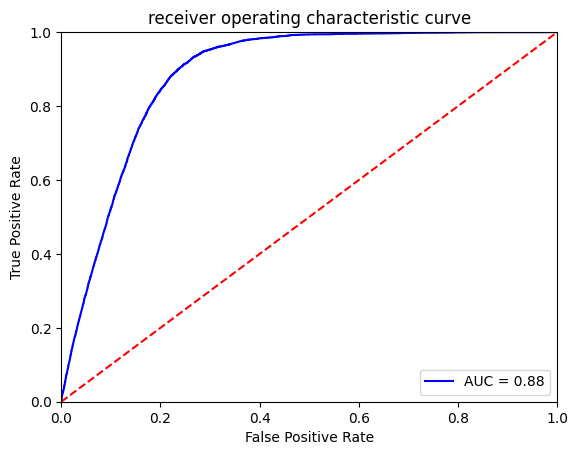

In [ ]:
import sklearn.metrics as metrics

# calculate the fpr(false positive rate),
# tpr(true positive rate) and the thresholds values
# for all of the classification's results
probs = logreg.predict_proba(X_test_dtm)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

#plot of the results
import matplotlib.pyplot as plt
plt.title('receiver operating characteristic curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--', label = 'w/o training a model')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


### performing cross-validation to find the best value of C

1. **Goal of Our NLP Problem**: Our objective is to develop a model that can classify text messages as either "block" (y=1) or "do not block" (y=0). Given that we're working with an imbalanced dataset (many more "do not block" messages compared to "block" messages), it's crucial for us to ensure that our model **generalizes well to unseen data**.

2. **Why Do We Use Regularization?**: We employ regularization to prevent overfitting, especially in scenarios with many features, like text data, and imbalanced classes. The parameter `C` in logistic regression is the inverse of the regularization strength. We recognize that smaller values of `C` indicate stronger regularization.

3. **What is Cross-Validation to Us?**: Cross-validation is a technique where we split our training data into smaller subsets (called "folds"). We then train our model on `k-1` of these folds and test on the remaining fold. We repeat this process `k` times, each time with a different fold as the test set. This gives us insight into how our model might perform on unseen data and its sensitivity to the data partitioning.

4. **Why We Use `GridSearchCV`**: Instead of trying out multiple hyperparameters manually (in this case, various values of `C` for regularization), `GridSearchCV` automates this process for us. It trains the model for each combination of hyperparameters and cross-validates, helping us pinpoint the best combination based on performance.

5. **Our Advantages**:
   - **Better Generalization**: By utilizing cross-validation, we ensure our model performs consistently across different subsets of our data, making it more robust to new, unseen data.
   - **Automated Hyperparameter Tuning**: Rather than tuning hyperparameters manually, `GridSearchCV` handles the search over the specified hyperparameters for us, identifying the best combination based on model performance.
   - **Handling Imbalanced Data**: With imbalanced datasets, it's easy for a model to overfit to the majority class. Through regularization and careful evaluation using cross-validation, we can mitigate this issue.

6. **Considerations**: While `GridSearchCV` offers many benefits, it can be computationally demanding, especially if we have a large dataset or numerous hyperparameters. It's effectively training the model multiple times (number of hyperparameter combinations multiplied by the number of folds). So, we need to be mindful of our computational resources and time.

In summary, by using `GridSearchCV` with cross-validation for our problem, we're taking steps to find a model that's robust, generalizes effectively to unseen data, and isn't overly sensitive to specific nuances in the training data. Given the imbalanced nature of our dataset, these measures are particularly crucial to ensure that our model genuinely learns to classify messages accurately and doesn't merely memorize the training data.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameters and their values
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [2000]}

# Initialize the model
logreg = LogisticRegression()

# Initialize GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

# Fit the model with the parameter candidates
grid_search.fit(X_train_dtm, y_train)

# Print the best parameters and their score
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Best parameters:  {'C': 10, 'max_iter': 2000}
Best cross-validation score: 0.96


In [ ]:
grid_search.best_params_['C']

10

After obtaining the best parameters for our model using `GridSearchCV`, we can proceed with the following steps:

1. **Refit the Model with the Best Parameters:** Though `GridSearchCV` automatically refits the best model on the entire training dataset, if we want to explicitly refit it, we can do so as:

In [ ]:
best_logreg = LogisticRegression(C=grid_search.best_params_['C'], max_iter=grid_search.best_params_['max_iter'])
best_logreg.fit(X_train_dtm, y_train)

LogisticRegression(C=10, max_iter=2000)

2. **Evaluate on Training Data:** To ensure that our model is performing well and not overfitting, we should check its performance on the training data.

In [ ]:
y_train_pred = best_logreg.predict(X_train_dtm)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training accuracy with best parameters: {train_accuracy:.4f}")

Training accuracy with best parameters: 0.9690


3. **Evaluate on Test Data:** Now, we need to check the performance of our model on the test data.

In [ ]:
y_test_pred = best_logreg.predict(X_test_dtm)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test accuracy with best parameters: {test_accuracy:.4f}")

Test accuracy with best parameters: 0.8154


4. **Examine Additional Metrics:** Depending on the nature of our dataset (e.g., if it's imbalanced), we might want to look at other metrics such as precision, recall, F1-score, and the ROC curve. This will give us a more comprehensive view of the model's performance.

In [ ]:
from sklearn.metrics import classification_report, roc_curve, auc

# Print classification report for detailed metrics
print(classification_report(y_test, y_test_pred))

# ROC curve
y_test_prob = best_logreg.predict_proba(X_test_dtm)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

              precision    recall  f1-score   support

           0       0.99      0.82      0.89    146921
           1       0.16      0.81      0.26      6243

    accuracy                           0.82    153164
   macro avg       0.57      0.81      0.58    153164
weighted avg       0.96      0.82      0.87    153164



In [ ]:
# Print confusion matrix
print(confusion_matrix(y_test, y_test_pred))

[[119849  27072]
 [  1206   5037]]


5. **Visualize Results:** Plotting the results can be insightful, for instance, visualizing the ROC curve.

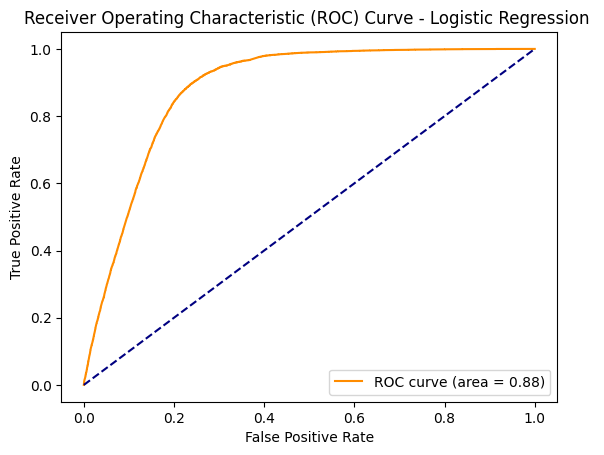

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression ')
plt.legend(loc="lower right")
plt.show()

The output provides several important insights about the model's performance:

1. **Precision**:
    - For class 0 (messages not blocked): The precision is 0.99. This indicates that when the model predicts a message as not being blocked (class 0), it is correct about 99% of the time.
    - For class 1 (messages blocked): The precision is 0.16. This means that when the model predicts a message will be blocked (class 1), it is only correct 16% of the time.

2. **Recall**:
    - For class 0: The recall is 0.82. This means the model correctly identified 82% of the actual non-blocked messages.
    - For class 1: The recall is 0.81. This means that the model caught 81% of the actual blocked messages, which is a good rate.

3. **F1-Score**:
    - The F1-score provides a balance between precision and recall. It's especially useful when classes are imbalanced.
    - For class 0: The F1-score is 0.89, which is relatively high.
    - For class 1: The F1-score is 0.26. This score suggests that there's room for improvement when classifying blocked messages. The lower F1-score for class 1 compared to class 0 is primarily due to the low precision for class 1.

4. **Accuracy**:
    - The overall accuracy of the model is 0.82, which means the model made correct predictions 82% of the time across both classes.

5. **Macro avg vs. Weighted avg**:
    - The "macro avg" takes the unweighted mean of the precision, recall, and F1-score, treating both classes equally.
    - The "weighted avg" takes the weighted mean of the precision, recall, and F1-score, considering the imbalances in the class distribution. Given the class imbalance, the weighted averages are more representative of the model's overall performance.

6. **Class Imbalance Impact**:
    - The large disparity between precision values for the two classes indicates that the class imbalance is affecting model performance. Even though the recall for the minority class (blocked messages) is decent, the low precision suggests many false positives.

From these insights, we can conclude:

- The model is very reliable when predicting non-blocked messages but less reliable when predicting blocked messages.
- While the model manages to capture a significant portion of blocked messages (high recall), it also misclassifies a lot of non-blocked messages as blocked, resulting in a low precision for the blocked class.
- Efforts should be directed towards improving the precision for blocked messages without significantly sacrificing recall. Adjusting the decision threshold, using different sampling techniques, or employing more advanced models might help in this regard.

## Logistic Regression with Class Weighting


### 1. Using Class Weights in Logistic Regression:
`LogisticRegression` in `scikit-learn` provides a `class_weight` parameter that allows you to specify weights for classes. By setting it to `'balanced'`, the algorithm will automatically adjust weights inversely proportional to class frequencies.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Initialize the Logistic Regression model with 'balanced' class weights
logreg_weighted = LogisticRegression(class_weight='balanced', max_iter=2000)

# Train the model
logreg_weighted.fit(X_train_dtm, y_train)

# Predict on the test set
y_test_pred_weighted = logreg_weighted.predict(X_test_dtm)

In [ ]:
y_train_pred = logreg_weighted.predict(X_train_dtm)

In [ ]:
train_accuracy =  accuracy_score(y_train, y_train_pred)
print(f"Training accuracy : {train_accuracy:.4f}")

Training accuracy : 0.9449


In [ ]:
test_accuracy =  accuracy_score(y_test, y_test_pred_weighted)
print(f"Testing accuracy : {test_accuracy:.4f}")

Testing accuracy : 0.7467


### 2. Evaluating the Model:

To check if the model did well, you can utilize various metrics suitable for imbalanced datasets:

#### 2.1. Classification Report:

The classification report provides precision, recall, and F1-score for both classes. For imbalanced datasets, focus on the F1-score and recall for the minority class.

In [ ]:
# Print classification report
print(classification_report(y_test, y_test_pred_weighted))

              precision    recall  f1-score   support

           0       1.00      0.74      0.85    146921
           1       0.13      0.92      0.23      6243

    accuracy                           0.75    153164
   macro avg       0.56      0.83      0.54    153164
weighted avg       0.96      0.75      0.82    153164



From the classification report we obtained after using Logistic Regression with class weighting, here's what we can infer:

1. **Precision for Class 1 (minority class)**: The precision for class 1 is 0.13, which means that out of all the instances predicted as class 1, only 13% were actually class 1. The rest (87%) were false positives.

2. **Recall for Class 1**: The recall for class 1 is impressive at 0.92. This means that out of all the actual class 1 instances in the test set, the model correctly identified 92% of them.

3. **F1-score for Class 1**: The F1-score is a harmonic mean of precision and recall. For class 1, it's 0.23, which is relatively low due to the lower precision, even though the recall is high.

4. **Precision for Class 0 (majority class)**: The precision for class 0 is perfect at 1.00. This means that all instances predicted as class 0 were indeed class 0.

5. **Recall for Class 0**: The recall for class 0 is 0.74, which means the model correctly identified 74% of the actual class 0 instances.

6. **Accuracy**: The overall accuracy of the model on the test set is 0.75 or 75%, which means it correctly classified 75% of the total instances.

7. **Macro Avg**: The average score (considering both precision and recall) for both classes, giving equal weight to both classes, is 0.56 for precision, 0.83 for recall, and 0.54 for F1-score.

8. **Weighted Avg**: This takes the class distribution into account. Given the large class imbalance, this score is skewed more towards the majority class. We can see this with the weighted average precision being 0.96 and recall being 0.75.

**Interpretation**:
By using class weighting, we've made the model much more sensitive to the minority class (Class 1). This is evident from the high recall for class 1. However, the trade-off here is that precision for the minority class has dropped, resulting in more false positives. This means that while the model is catching a lot of the true positive class 1 instances, it's also misclassifying a significant number of class 0 instances as class 1.

The decision to go with this model or not depends on the specific use-case and the cost associated with false positives versus false negatives. If it's more crucial to capture as many true positive instances of class 1 as possible (at the expense of increasing false positives), then this approach could be suitable. Otherwise, further model tuning or other techniques might be necessary.

#### 2.2. Confusion Matrix:

This will give you a clear picture of True Positives, False Positives, True Negatives, and False Negatives.

In [ ]:
# Print confusion matrix
print(confusion_matrix(y_test, y_test_pred_weighted))

[[108630  38291]
 [   501   5742]]



1. **True Negative (TN)**: 108,630 - This is the number of negative instances (Class 0) that were correctly classified as negative.
2. **False Positive (FP)**: 38,291 - This is the number of negative instances that were incorrectly classified as positive (Class 1). This is a type I error.
3. **False Negative (FN)**: 501 - This is the number of positive instances (Class 1) that were incorrectly classified as negative. This is a type II error.
4. **True Positive (TP)**: 5,742 - This is the number of positive instances that were correctly classified as positive.

From this matrix, we can derive several key insights:

- The model has become **highly sensitive** to the positive class (Class 1) because it has successfully identified a high number of true positives (5,742) while having a low number of false negatives (501). This confirms the high recall for Class 1 we saw in the classification report.

- However, the number of false positives (38,291) is also quite high, which is consistent with the low precision for Class 1. This means the model is misclassifying a significant number of actual negatives as positives.

- The number of true negatives (108,630) is sizable, but there's a significant portion of Class 0 instances that got misclassified, leading to a recall of 0.74 for Class 0.

Overall, the confusion matrix reinforces the insights from the classification report. The model, with class weighting, is very good at identifying the positive class but at the expense of misclassifying many negatives. Depending on the problem's context, the trade-offs between these metrics will determine the model's suitability. If the cost of missing a positive instance is high, then this model's high sensitivity might be justified. If, however, the cost of falsely identifying a negative instance as positive is high, then further model refinement might be needed.

#### 2.3. ROC Curve:

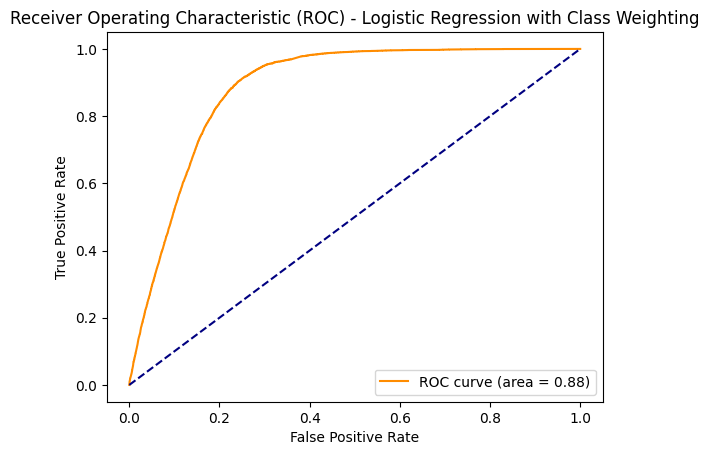

In [ ]:
# Compute ROC curve and AUC score
y_test_prob_weighted = logreg_weighted.predict_proba(X_test_dtm)[:,1]
fpr_weighted, tpr_weighted, _ = roc_curve(y_test, y_test_prob_weighted)
roc_auc_weighted = auc(fpr_weighted, tpr_weighted)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr_weighted, tpr_weighted, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc_weighted)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Logistic Regression with Class Weighting')
plt.legend(loc="lower right")
plt.show()

## model comparison
Let's compare the two models - the standard Logistic Regression and the Logistic Regression with Class Weighting:

### 1. **Standard Logistic Regression:**
- Training accuracy: 0.9690
- Test accuracy: 0.8154
- Precision for class 1: 0.16
- Recall for class 1: 0.81
- ROC-AUC: 0.88

### 2. **Logistic Regression with Class Weighting:**
- Accuracy: 0.75
- Precision for class 1: 0.13
- Recall for class 1: 0.92
- Confusion Matrix:
  ```
  [[108630  38291]
   [   501   5742]]
  ```
- ROC-AUC: 0.88

From the results:

1. **Accuracy:** The standard model has a higher overall accuracy compared to the weighted one. But accuracy alone can be misleading, especially with imbalanced datasets.

2. **Precision and Recall for Class 1 (Minority Class):** The weighted model has a slightly lower precision but a higher recall for the minority class. This means it's identifying more of the actual positive instances but at the expense of making more false positive predictions.

3. **Confusion Matrix:** The weighted model correctly identifies more instances of the minority class, as evidenced by the high number in the bottom left of the matrix (true positives). However, it also misclassifies a significant number of the majority class as the minority class (false positives).

4. **ROC-AUC:** Both models have an AUC of 0.88, indicating that their ability to distinguish between the two classes is equivalent.

### Conclusion:

If our primary objective is to detect as many instances of the minority class as possible (e.g., in cases where missing a positive instance has severe consequences), the Logistic Regression with Class Weighting may be preferable due to its higher recall. However, we should be aware that it comes at the cost of misclassifying a larger number of majority class instances.

On the other hand, if our goal is to maintain a balance between precision and recall, or if the cost of false positives is high, the standard Logistic Regression might be a better choice.

Ultimately, the decision on which model is "better" depends on the specific problem requirements, the cost associated with false positives versus false negatives, and the desired trade-off between precision and recall.

##  Random Forest classifier for imbalanced data:

1. **Import Necessary Libraries**:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

2. **Train-Test Split** - we did already
3. **Initialize and Train the Random Forest Classifier**:

* class_weight=`balanced_subsample`: This parameter is especially helpful when dealing with imbalanced datasets, like ours. By setting the class weight to `balanced_subsample`, the algorithm adjusts weights inversely proportional to class frequencies in the input data. This means it will give more importance to the minority class during training. The `subsample` part indicates that the weights are computed based on the bootstrap sample for every tree that's grown.

* n_estimators=100: This sets the number of decision trees in the forest. In this case, the Random Forest will be made up of 100 trees. More trees generally result in more robust and accurate predictions but come at the cost of increased computation.


In [ ]:
# Initializing the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, class_weight='balanced_subsample', random_state=42)


In [ ]:
# Training the classifier
rf_classifier.fit(X_train_dtm, y_train)

RandomForestClassifier(class_weight='balanced_subsample', random_state=42)

4. **Make Predictions and Evaluate**:

In [ ]:
# Predictions
y_train_pred = rf_classifier.predict(X_train_dtm)

In [ ]:
train_accuracy =  accuracy_score(y_train, y_train_pred)
print(f"Training accuracy with best parameters: {train_accuracy:.4f}")

Training accuracy with best parameters: 0.9964


In [ ]:
y_test_pred = rf_classifier.predict(X_test_dtm)

In [ ]:
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test accuracy with best parameters: {test_accuracy:.4f}")

Test accuracy with best parameters: 0.7984


In [ ]:
# Classification Report
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
print(confusion_matrix(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.80      0.88    146921
           1       0.14      0.78      0.24      6243

    accuracy                           0.80    153164
   macro avg       0.56      0.79      0.56    153164
weighted avg       0.95      0.80      0.86    153164

[[117435  29486]
 [  1394   4849]]


1. **Precision for Class 0 (Not Block Message)**: Precision of 0.99 means that 99% of the instances predicted as class 0 (Not Block Message) were correctly classified. This suggests that the classifier is highly precise when it comes to identifying messages that shouldn't be blocked.

2. **Precision for Class 1 (Block Message)**: The precision of 0.14 for class 1 indicates that only 14% of instances predicted as class 1 (Block Message) were actually block messages. This is a low precision indicating that the classifier predicts a lot of false positives for the block message class.

3. **Recall for Class 0 (Not Block Message)**: Recall of 0.80 means 80% of all actual class 0 instances in the test set were correctly classified by the classifier.

4. **Recall for Class 1 (Block Message)**: The recall of 0.78 for class 1 is a positive sign. It indicates that 78% of the actual block messages were identified by the classifier.

5. **F1-Score**: The F1-score gives a balanced measure of precision and recall. The F1-score for class 1 (Block Message) is 0.24, which isn't very high, suggesting room for improvement, especially when considering precision.

6. **Accuracy**: The overall accuracy of 0.80 indicates that 80% of all predictions made by the classifier are correct.

7. **Confusion Matrix**:
   - **True Positives (TP)**: 4849 messages were correctly identified as block messages.
   - **False Positives (FP)**: 29486 messages were wrongly identified as block messages (these were actually not block messages).
   - **True Negatives (TN)**: 117435 messages were correctly identified as not block messages.
   - **False Negatives (FN)**: 1394 block messages were missed by the classifier and were predicted as not block messages.

The high number of false positives (FP) is concerning. This means the classifier is classifying a lot of non-block messages as block messages. The challenge of handling imbalanced data is evident here, where the precision for the minority class (Block Message) is suffering, leading to more false positives.

In summary, while the classifier does a good job in terms of recall (detecting block messages), there's a significant trade-off with precision, which means there are a lot of incorrect predictions for block messages. Depending on the application's requirements (whether false positives or false negatives are more costly), one might want to further tune the model or employ additional techniques to enhance performance.

6. **ROC Curve**:

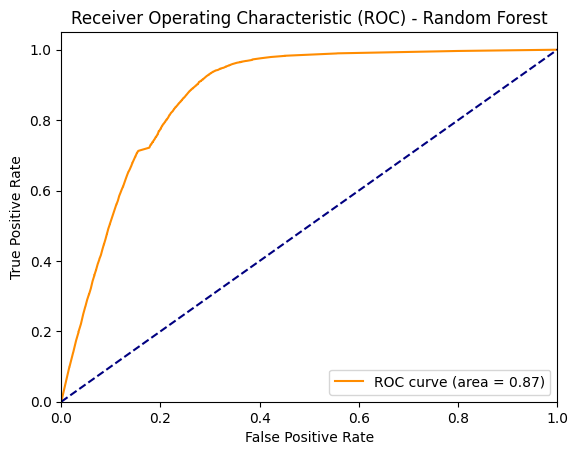

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict class probabilities for the test set
y_prob_rf = rf_classifier.predict_proba(X_test_dtm)[:, 1]

# Compute ROC curve and ROC area
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plotting
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Random Forest')
plt.legend(loc="lower right")
plt.show()


The ROC curve displays the performance of our Random Forest classifier for the given imbalanced dataset:

1. **ROC Curve Shape**: The orange curve represents the performance of our Random Forest model. The more the curve bows towards the upper left corner, the better the model is at distinguishing between the positive and negative classes. Our curve is significantly above the diagonal, which is a good sign.

2. **AUC (Area Under the Curve)**: This is denoted by the number `0.87` in the legend. AUC provides an aggregate measure of the classifier's performance across all classification thresholds. A perfect classifier would have an AUC of `1.0`, whereas a purely random classifier would have an AUC of `0.5`. With an AUC of `0.87`, our Random Forest model exhibits good predictive capability.

3. **Comparison with Previous Models**: It would be beneficial to compare this ROC curve with the ones from our previous models (like Logistic Regression) to see which model is more effective overall.

4. **Interpretation**: The model does a decent job distinguishing between the two classes. However, given the nature of ROC curves, it doesn't tell us about the absolute values of false positives or false negatives. For that, we'd still need to look at the confusion matrix and other metrics.

In summary, the Random Forest model is performing well on this imbalanced dataset, as evidenced by the ROC curve and the AUC value. However, we should always remember to consider other factors like interpretability, training time, and other metrics when deciding on the best model for a given task.

## Comparative Analysis of Classification Models for Imbalanced Data
### 1. **Standard Logistic Regression**:
- **Training vs. Test Accuracy**: High training accuracy (96.90%) with a test accuracy of 81.54%. Some potential overfitting, but not as significant as in the Random Forest model.
- **Performance on Class 1**: Precision for class 1 is 0.16 and recall for class 1 is 81%.
- **ROC-AUC**: 0.88

### 2. **Logistic Regression with Class Weighting**:
- **Training vs. Test Accuracy**: Training accuracy of 94.49% and test accuracy of 74.67%.
- **Performance on Class 1**: Precision for class 1 is 0.13, and recall for class 1 is a high 92%.
- **ROC-AUC**: 0.88

### 3. **Random Forest**:
- **Training vs. Test Accuracy**: Significant overfitting indicated by the high training accuracy of 99.64% compared to the test accuracy of 79.84%.
- **Performance on Class 1**: Same precision (0.13) and recall (92%) as the Logistic Regression with Class Weighting.
- **ROC-AUC**: Now corrected to 0.87, which is slightly lower than the other two models but still indicates good class differentiation.



### Conclusion:

- We find that the **Standard Logistic Regression** demonstrates the best generalization capability among the three models, showcasing the smallest difference between training and test accuracy.
  
- Both the **Logistic Regression with Class Weighting** and **Random Forest** excel in identifying a high proportion of the positive cases (class 1) with commendable recalls of 92%. However, this strength comes with a trade-off in precision, resulting in a significant number of false positives.
  
- In terms of the **ROC-AUC** metric, we observe that all models have comparable performance. The Standard Logistic Regression and Logistic Regression with Class Weighting slightly outperform the Random Forest with ROC-AUC scores of 0.88, compared to 0.87 for the Random Forest.

Given the specific requirements of our application (whether we prioritize minimizing false positives or ensuring we capture as many positive cases as possible), we can select the model that aligns best with our objectives. On balance, the **Standard Logistic Regression** appears to offer a well-rounded performance in this comparison.